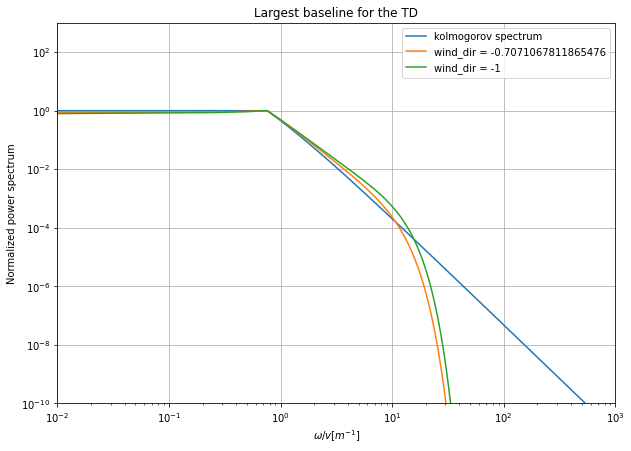

In [67]:
#!/usr/bin/python3.8
from scipy.integrate import quad
import matplotlib.pylab as plt
import numpy as np

# linear temperature gradient
def TP(z, t_g, z_0):
    return t_g * ( 1 - (z / z_0) )

# exponential decay of the water vapor
def CorrCoef(z, c_0, z_0):
    return c_0 * np.exp(-(z/z_0))

# Gaussian beam waist
def beam_waist(z, lam, w_0):
    return w_0 * np.sqrt(1+(  (lam**2 * z**2)/(np.pi**2 * w_0**4)  ))

# Description of the inter. beam area (Church 1995)
def interf_beam(z, x, lam, D, v, w_0, theta):
    return np.exp(-1*w_0* np.sqrt((1+lam**2*z**2/np.pi**2/w_0**4)) * 0.25 * ((x/v) + ((2*np.pi*D*cos_th)/(lam*z)) )**2 ) / beam_waist(z, lam, w_0)

# The whole integral
def integ(z, x, lam, D, C, v, c_0, z_0, t_g, w_0, cos_th):
    return C * (CorrCoef(z, c_0, z_0)**2) *  (TP(z, t_g, z_0)**2) * interf_beam(z, x, lam, D, v, w_0, cos_th)
    
# Frequency range
x = np.linspace(0.01,1000, 4000, dtype=float)

# Wavelenght
lam = 0.02

# w_0 is linked to the FWHM 8.54deg, is it correct?
w_0 = (np.sqrt(2*np.log(2))/np.pi) * lam / np.deg2rad(8)

# Water wapor normalization coefficient
c_0 = 1

# Atmospheric upper limit (no tropopause)
z_0 = 1

# Ground temperature
t_g = 290

# Baseline
D = 0.013

# Atmospheric correlation leght
L = 1

# Wind speed in m/s
v = 1

# Coefficient
C = np.sqrt(2/np.pi)*((L)**(2/3)/v)  

k = 0
p = 0

PS_1 = np.zeros(len(x))
for i in x:
    if (i < 1):
        PS_1[k] = 1.0
        k = k+1
        p = p+1
    else:
        PS_1[k-1] = (i/v)**(-11/3)
        k=k+1
        
PS_1[p-1::] /= PS_1[p-1]      

    

plt.figure(figsize=(10,7))


plt.plot(x, PS_1, label="kolmogorov spectrum")
plt.ylabel("Normalized power spectrum")
plt.xlabel("$\omega / v [m^{-1}]$")
plt.title("Largest baseline for the TD")

# The integral performed from 300m to 4000m in order to ensure the approximation L_0 << w(Z)
# Church 1995 eq 21
for cos_th in [-np.cos(np.deg2rad(45)), -1]:
    integrals = np.array([])

    for i in x:
        I = quad(integ, 0.4, 1, args=(i, lam, D, C, v, c_0, z_0, t_g, w_0, cos_th))[0]
        integrals = np.append(integrals, I)

    beam_fil = (integrals / np.amax(integrals))
    
    # spectr_case1 = (x/v)**(-11/3)
    # PS_1 = spectr_case1/np.amax(spectr_case1)
    
    Tot_spec = beam_fil*PS_1
    
    # Integral evaluater for different wind direction
    plt.loglog(x, Tot_spec/np.amax(Tot_spec), label="wind_dir = {}".format(cos_th))
    plt.ylim(1e-10, 1e3)
    plt.xlim(1e-2, 1e3)
plt.grid()
plt.legend()    
plt.savefig("large.png")


(0.01, 100.0)

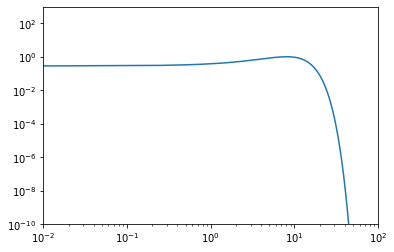

In [68]:
plt.loglog(x, beam_fil)
plt.ylim(1e-10, 1e3)
plt.xlim(1e-2, 1e2)